## Import Library

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

## Baca dan buat dataframe berdasarkan semester

In [19]:
df = pd.read_csv("data proyek 3b.csv")

semester_dummies = df['Semester pinjam'].str.get_dummies(',')
# Pisahkan semester
data = pd.concat([df, semester_dummies], axis=1)
data = data.drop('Semester pinjam', axis=1)
data.head()

,Timestamp,Email,Nama,Gender,Angkatan,Prodi,Meminjam,Semester tidak pinjam,2,3,4,5,6,1,3,4,5,6
0,02/05/2024 12:25:00,stevenjohan.sjj@gmail.com,Steven Johan,Laki-laki,2022,IBDA,Pernah,4,1,1,0,0,0,1,0,0,0,0
1,02/05/2024 12:30:45,renatakharis282@gmail.com,Renata Kharis Enggrasari,Perempuan,2022,BMS,Pernah,"2,3,4",0,0,0,0,0,1,0,0,0,0
2,02/05/2024 12:31:16,geryyulianto07@gmail.com,Ger,Laki-laki,2022,IBDA,Tidak Pernah,"1,2,3,4",0,0,0,0,0,0,0,0,0,0
3,02/05/2024 12:41:30,glim76@students.calvin.ac.id,Grace Calista Lim,Perempuan,2022,IBDA,Pernah,"2,3,4",0,0,0,0,0,1,0,0,0,0
4,02/05/2024 12:44:15,hizkiank256p@gmail.com,Hizkia Justine Hasan,Laki-laki,2022,IBDA,Pernah,4,1,1,0,0,0,1,0,0,0,0


## Distribusi Data Berdasarkan Beberapa Kategori

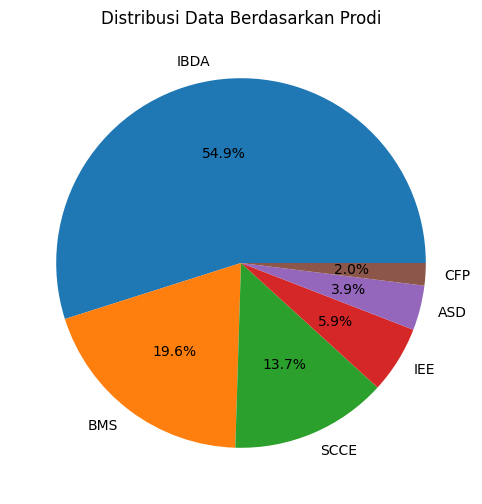

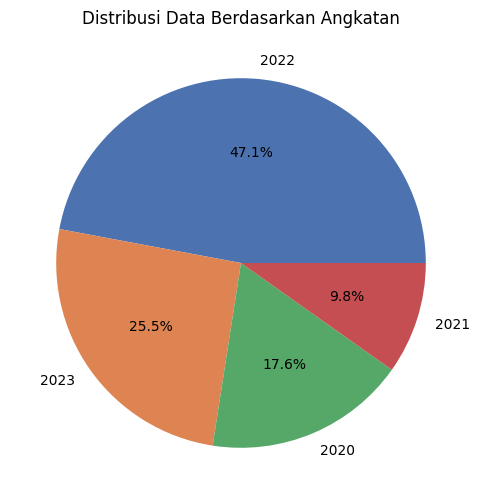

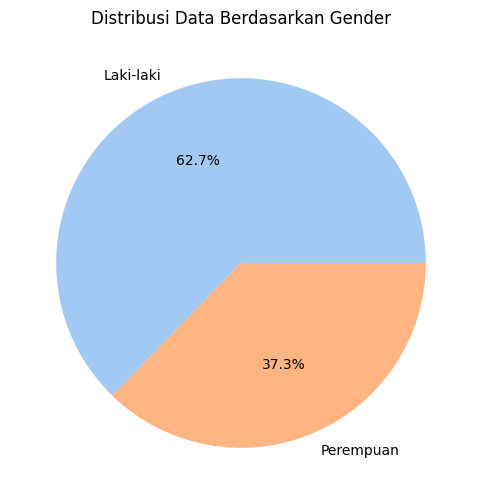

In [20]:
#Pie chart

#By Prodi
prodi_counts = data['Prodi'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(prodi_counts.values, labels=prodi_counts.index, autopct='%1.1f%%')
plt.title('Distribusi Data Berdasarkan Prodi')

plt.show()

#By Angkatan
angkatan_counts = data['Angkatan'].value_counts()

plt.figure(figsize=(8, 6))
color_palette = sns.color_palette('deep')
plt.pie(angkatan_counts.values, labels=angkatan_counts.index, autopct='%1.1f%%', colors=color_palette)
plt.title('Distribusi Data Berdasarkan Angkatan')

plt.show()

#By Gender
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(8, 6))
color_palette = sns.color_palette('pastel')
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=color_palette)
plt.title('Distribusi Data Berdasarkan Gender')

plt.show()

# Masalah 1

## 1. Formulasikan Hipotesis


Misalkan $X$ menyatakan variabel acak dari tingkat **ketidakliterasian** Liberal Arts mahasiswa CIT. Untuk menguji apakah pernyataan "$P_X > 75\%$" sahih secara statistika, maka tuliskan pernyataan tersebut sebagai **hipotesis tandingan ($H_1$)**, yaitu

$$
\begin{align*}
H_0&: P_X > 75\% \\
H_1&: P_X \le 75\%
\end{align*}
$$

## 2. Pilih Tingkat Signifikansi

In [21]:
alpha = 0.05

## 3. Pilih statistik yang sesuai
- Yang hendak diuji adalah proporsi populasi
- 1 Populasi
- $\ge$ 30 data \
Berdasarkan poin diatas maka kami akan menggunakan z-score proportion 1 populasi

In [22]:
#Change data
popmean = 0.75
alt = 'smaller'

#For Proportions
data['Meminjam'] = data['Meminjam'].replace(['Pernah', 'Tidak Pernah'], [0, 1])
count_nonliteracy = (data['Meminjam'] == 1).sum()
count_data = len(data)

#For ztest
data_meminjam = data['Meminjam']
lst = data_meminjam.to_list()

## 4. Perhitungan menggunakan proportions_ztest

In [23]:
stats, pvalue = proportions_ztest(count_nonliteracy, count_data, popmean, alt)
print(f"\tstats: {stats}")
print("\tP Value:", format(pvalue, ".10f"))

if (pvalue > alpha):
    print(f"\tWith confidence level {(1-alpha)*100:3.0f}%, it failed to reject the Null Hypothesis.")
else:
    print(f"\tWith confidence level {(1-alpha)*100:3.0f}%, it is statistically valid to reject the Null Hypothesis.")


	stats: -4.907992752352316
	P Value: 0.0000004601
	With confidence level  95%, it is statistically valid to reject the Null Hypothesis.


## 5. Kesimpulan
Dengan tingkat keyakinan 95% maka hipotesa null (tingkat "ketidakliterasian" mahasiswa CIT > 75% ) dapat ditolak. Oleh karena itu Hipotesa 1 dapat dipertimbangkan (tingkat "ketidakliterasian" mahasiswa CIT $\le$ 75%)

# Masalah 2

## Function

In [24]:
# Data ke list
def convert_to_list(val):
    if pd.isna(val):  # Kalau NaN tetap NaN
        return val
    else:  # jika bukan ubah jadi int dalam list
        return list(map(int, val.split(',')))

# Khusus semester ganjil
def filter_semester_ganjil(df):
    new_df = df.copy()
    new_col = []
    for row in df['Semester tidak pinjam']:
        if isinstance(row, list):
            is_odd = any(val % 2 == 1 for val in row if isinstance(val, int))
            new_col.append(1 if is_odd else 0)
        else:
            new_col.append(0)
    new_df['Semester Ganjil'] = new_col
    return new_df

# Khusus semester genap
def filter_semester_genap(df):
    new_df = df.copy()
    new_col = []
    for row in df['Semester tidak pinjam']:
        if isinstance(row, list):
            is_even = any(val % 2 == 0 for val in row if isinstance(val, int))
            new_col.append(1 if is_even else 0)
        else:
            new_col.append(0)
    new_df['Semester Genap'] = new_col
    return new_df

In [25]:
df['Semester pinjam'] = df['Semester pinjam'].apply(convert_to_list)
df['Semester tidak pinjam'] = df['Semester tidak pinjam'].apply(convert_to_list)

df_ganjil = filter_semester_ganjil(df)
df_genap = filter_semester_genap(df)

In [26]:
df_ganjil_view = df_ganjil[df_ganjil['Semester Ganjil'] == 1]
df_genap_view = df_genap[df_genap['Semester Genap'] == 1]
df_genap_view.head()

,Timestamp,Email,Nama,Gender,Angkatan,Prodi,Meminjam,Semester pinjam,Semester tidak pinjam,Semester Genap
0,02/05/2024 12:25:00,stevenjohan.sjj@gmail.com,Steven Johan,Laki-laki,2022,IBDA,Pernah,"[1, 2, 3]",[4],1
1,02/05/2024 12:30:45,renatakharis282@gmail.com,Renata Kharis Enggrasari,Perempuan,2022,BMS,Pernah,[1],"[2, 3, 4]",1
2,02/05/2024 12:31:16,geryyulianto07@gmail.com,Ger,Laki-laki,2022,IBDA,Tidak Pernah,NaN,"[1, 2, 3, 4]",1
3,02/05/2024 12:41:30,glim76@students.calvin.ac.id,Grace Calista Lim,Perempuan,2022,IBDA,Pernah,[1],"[2, 3, 4]",1
4,02/05/2024 12:44:15,hizkiank256p@gmail.com,Hizkia Justine Hasan,Laki-laki,2022,IBDA,Pernah,"[1, 2, 3]",[4],1


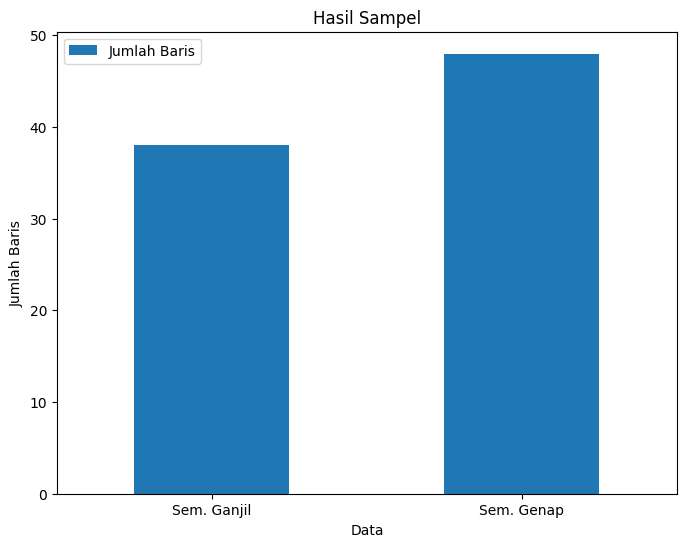

In [27]:
# Tampilkan dalam bar plot

count1 = len(df_ganjil_view)
count2 = len(df_genap_view)

data = {'Data': ['Sem. Ganjil', 'Sem. Genap'], 'Jumlah Baris': [count1, count2]}
df_bar = pd.DataFrame(data)

# Bar Plot
plt.figure(figsize=(8, 6))
ax = plt.gca()
df_bar.plot(kind='bar', x='Data', y='Jumlah Baris', ax=ax)
ax.set_title('Hasil Sampel')
ax.set_xlabel('Data')
ax.set_ylabel('Jumlah Baris')

plt.xticks(rotation=0)

plt.show()

Berdasarkan bar plot sampel, dapat dikatakan bahwa jumlah mahasiswa yang tidak meminjam lebih kecil di semester ganjil dibandingkan semester genap, tapi apakah hasilnya akan sama untuk populasi?

## Pilih Tingkat Signifikansi

In [28]:
# Tetapkan nilai alpha
# Variabel alpha menyatakan tingkat signifikansi
# Artinya 1 - alpha adalah tingkat keyakinan
alpha = 0.05

## Hitung P-value dari statistik dengan menggunakan Z-Test

In [29]:
z_stats, pval = ztest(x1= df_ganjil['Semester Ganjil'], x2= df_genap['Semester Genap'])
print(f'stats: {z_stats}')
print(f'P value: {pval}')

stats: -2.7994625547792706
P value: 0.005118775308705162


## Formulasikan Hipotesis

Hipotesis Awal : "Secara keseluruhan persentase mahasiswa yang tidak meminjam buku *liberal arts* pada semester ganjil lebih **besar** dibanding semester genap"

Misalkan $X$ menyatakan variabel acak yang mewakili persentase peminjaman di semester ganjil dan $Y$ mewakili persentase peminjaman di semester genap. Untuk menguji apakah pernyataan "$\mu_X > \mu_Y $" sahih secara statistika, maka tuliskan pernyataan tersebut sebagai **hipotesis tandingan ($H_1$)**, yaitu


$$
\begin{align*}
H_0&: \mu_X \le \mu_Y\\
H_1&: \mu_X > \mu_Y
\end{align*}
$$

In [30]:
if pval > alpha:
    print(f"Dengan tingkat kepercayaan {(1-alpha)*100:3.0f}%, terdapat cukup bukti untuk menolak H0.")
    print("H1 dapat dipertimbangkan sebagai kesimpulan alternatif")
    print('"Secara keseluruhan persentase mahasiswa yang tidak meminjam buku Liberal Arts pada semester ganjil lebih BESAR dibanding semester genap"')
else:
    print(f"Dengan tingkat kepercayaan {(1-alpha)*100:3.0f}%, 'tidak' terdapat cukup bukti untuk menolak H0.")
    print("Tidak ada kesimpulan yang bisa ditarik")

Dengan tingkat kepercayaan  95%, 'tidak' terdapat cukup bukti untuk menolak H0.
Tidak ada kesimpulan yang bisa ditarik


## Hipotesa Alternatif

Hipotesis Alternatif : "Secara keseluruhan persentase mahasiswa yang tidak meminjam buku *liberal arts* pada semester ganjil lebih **kecil** dibanding semester genap"

Misalkan $X$ menyatakan variabel acak yang mewakili persentase peminjaman di semester ganjil dan $Y$ mewakili persentase peminjaman di semester genap. Untuk menguji apakah pernyataan "$\mu_X < \mu_Y $" sahih secara statistika, maka tuliskan pernyataan tersebut sebagai **hipotesis tandingan ($H_1$)**, yaitu


$$
\begin{align*}
H_0&: \mu_X \ge \mu_Y\\
H_1&: \mu_X < \mu_Y
\end{align*}
$$

In [31]:
# Buat kesimpulan
if pval < alpha:
    print(f"Dengan tingkat kepercayaan {(1-alpha)*100:3.0f}%, terdapat cukup bukti untuk menolak H0.")
    print("H1 dapat dipertimbangkan sebagai kesimpulan alternatif")
    print('"Secara keseluruhan persentase mahasiswa yang tidak meminjam buku Liberal Arts pada semester ganjil lebih KECIL dibanding semester genap"')
else:
    print(f"Dengan tingkat kepercayaan {(1-alpha)*100:3.0f}%, 'tidak' terdapat cukup bukti untuk menolak H0.")
    print("Tidak ada kesimpulan yang bisa ditarik")

Dengan tingkat kepercayaan  95%, terdapat cukup bukti untuk menolak H0.
H1 dapat dipertimbangkan sebagai kesimpulan alternatif
"Secara keseluruhan persentase mahasiswa yang tidak meminjam buku Liberal Arts pada semester ganjil lebih KECIL dibanding semester genap"


## Kesimpulan yang dapat ditarik

Dengan tingkat keyakinan 95%, uji hipotesis tidak dapat membuktikan perkataan Dr. Knox. Namun, kesimpulan tandingannya dapat dipertimbangkan sebagai kesimpulan sementara, yaitu "Secara keseluruhan persentase mahasiswa yang tidak meminjam buku Liberal Arts pada semester ganjil lebih **kecil** dibanding semester genap".

Dengan catatan, hasil ini kami dapatkan dari sampel dataset yang kelompok 5 kumpulkan. Hasil tersebut bisa saja berubah jika menggunakan dataset dan teknik <i>sampling</i> yang berbeda

# Masalah 3

Untuk masalah 3 Kami perlu merubah kolom "Semester pinjam" menjadi atomic agar dapat dimanipulasi dengan baik.

In [32]:
df = pd.DataFrame(pd.read_csv("data_masalah_3.csv"))
df = df.dropna()
df = df.assign(Semester_pinjam=df['Semester pinjam'].str.split(', ')).explode('Semester_pinjam').reset_index(drop=True).drop(columns=["Semester pinjam"])

Misalkan X menyatakan variabel acak yang mewakili  jumlah mahasiswa yang meminjam buku RLAC pada tahun berikutnya dan Y adalah jumlah mahasiswa yang meminjam buku RLAC pada tahun pertama.

Untuk menguji apakah pernyataan "μx > Y" sahih secara statistika, maka tuliskan pernyataan tersebut sebagai hipotesis tandingan (H1), yaitu

## Formulasikan Hipotesis
$$
\begin{align*}
H_0&: \mu_X > Y\\
H_1&: \mu_X \le Y
\end{align*}
$$

In [34]:
import scipy.stats as stats
df["Semester_pinjam"]
df['Semester_pinjam'] = df['Semester_pinjam'].astype(int)

df['Group'] = df['Semester_pinjam'].apply(lambda x: 'first_year' if x in [1, 2] else 'after_first_year') #labeling jadi first ato not first
borrowing_counts = df['Group'].value_counts()
print(borrowing_counts)

first_year_data = df[df['Group'] == 'first_year']['Semester_pinjam']
after_first_year_data = df[df['Group'] == 'after_first_year']['Semester_pinjam']
df.head()


Group
first_year          29
after_first_year    21
Name: count, dtype: int64


,Timestamp,Email,Nama,Gender,Angkatan,Prodi,Meminjam,Semester tidak pinjam,Semester_pinjam,Group
0,02/05/2024 12:25:00,stevenjohan.sjj@gmail.com,Steven Johan,Laki-laki,2022,IBDA,Pernah,4,1,first_year
1,02/05/2024 12:25:00,stevenjohan.sjj@gmail.com,Steven Johan,Laki-laki,2022,IBDA,Pernah,4,2,first_year
2,02/05/2024 12:25:00,stevenjohan.sjj@gmail.com,Steven Johan,Laki-laki,2022,IBDA,Pernah,4,3,after_first_year
3,02/05/2024 12:30:45,renatakharis282@gmail.com,Renata Kharis Enggrasari,Perempuan,2022,BMS,Pernah,"2,3,4",1,first_year
4,02/05/2024 12:41:30,glim76@students.calvin.ac.id,Grace Calista Lim,Perempuan,2022,IBDA,Pernah,"2,3,4",1,first_year


Setelah table menjadi atomic, kami melabel seluruh data mahasiswa kedalam First year dan After first year agar dapat dihitung perbedaannya. Kami mnghitung Nilai P value dengan  `stats.ttest_ind` karena terdapat 2 populasi dengan salah satunya memiliki sampel dibawah 30.

In [35]:
stat,p_value = stats.ttest_ind(first_year_data,after_first_year_data,alternative="less")

print(f"Statistics: {stat}, P-value: {p_value}")

alpha = 0.05

print("Hypothesis Testing Result:")
print("-----------------------------")
if (p_value > alpha):
    print(f"\tWith confidence level {(1-alpha)*100:3.0f}%, tidak menolak H0.")
else:
    print(f"\tWith confidence level {(1-alpha)*100:3.0f}%, menolak H0.")
    print("MENOLAK h0")


Statistics: -10.602998013721443, P-value: 1.7986678218406917e-14
Hypothesis Testing Result:
-----------------------------
	With confidence level  95%, menolak H0.
MENOLAK h0


Dengan P value lebih kecil dari Alpha, maka kami menolak h0 yang berarti, **tidak ada** peningkatan peminjam setelah tahun ajaran pertama dilalui